# PUI final exam 2020

## Theoretic part

## Question 1. 
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

#### Answer: C

Supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not. In supervised learning, the algorithm “learns” from the training dataset by iteratively making predictions on the data and adjusting for the correct answer.


This task contains label and dont. It is divided in two part. So it is Semi-supervised learning; Semi-Supervised Learning (SSL) is a key research problem in the field of pattern recognition and machine learning, and is a learning method that combines supervised learning with unsupervised learning.



## Question 2. 
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

####  Answer: C、D

p value for the variables x1=0.03 x2=0.3 x3=0.15, which x1 is significant but x2,x3 is not significant at 5% level.So C is right. And D is right.

x1=2x3,that just significance level,not impact.For impact we should see the value of coefficient.Thus A is wrong.
We can get that Regressors  𝑥2  and  𝑥3  are irrelevant frome the information. Thus B is wrong. The interval may contain and not. It depends on the mean and squares.

## Question 3. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

#### Answer: D、E

𝑅2 is not primarily intended as a diagnostic for overfitting. Thus A is wrong.

Overfitting problem often happens when we have too much features. Many observations can help improve the model. Thus B is wrong D is right.

For C&E: 𝑅2 is not primarily intended as a diagnostic for overfitting but when the out-sample r2 is comparatively lower. It indicates the overfitting problem. Overfitting problem could be detected by R2 if out-of-sample R2 is very low compared to in-sample R2.


## Question 4. 
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%. 

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem? 

c) What would you expect the in-sample R2 to increase or decrease after that applying suggested approaches from step b)? What about the out-of-sample (test) R2?

### Answer A
It has the Overfitting problem. Overfitting problem could be detected by R-squared if out-of-sample R-squared is very low compared to in-sample R-squared. If we add more, the r2 of in_sample might increase but out sample my decrease. So it will not help if we add more regressors.

### Answer B

1) we can regularize the data or standarlize the data. Different data are available in different units.Regularization helps reduce noise

2) We can use advanced regression methods, such as ridge regression and lasso regression. These regressions have a factor selection process to avoid overfitting.

3) we can use feature selection process by try different model. Such as using loop to try different model. For example, we can try x1, x1+x2, x1+x2+x3. Repeated the process, find the best regression.




### Answer C:

In sample r2 may decrease due to less regressors. But some extra noise is out. Thus our out sample r2 will increase. Thus we dont have the overfitting problem. Regularization also help improve test set performance.


In [1]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC. 
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [2]:
# import and curate the dataset
TaxiRidership = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAFlightArrival.csv")

In [3]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [4]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [5]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')

In [6]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [7]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [8]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

## Task 1. Spatial visualization

### Q1. Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale.

In [9]:
TaxiRidership

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01 00:00:00,0.0,0,0,0
1,2,2018-01-01 00:00:00,0.0,0,0,0
2,3,2018-01-01 00:00:00,0.0,0,0,0
3,4,2018-01-01 00:00:00,0.0,0,0,0
4,5,2018-01-01 00:00:00,0.0,0,0,0
...,...,...,...,...,...,...
2251315,259,2018-12-31 23:00:00,2.0,0,23,364
2251316,260,2018-12-31 23:00:00,3.0,0,23,364
2251317,261,2018-12-31 23:00:00,1.0,0,23,364
2251318,262,2018-12-31 23:00:00,8.0,0,23,364


In [10]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
mapid = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
mapid

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [11]:
TaxiRidership.DOLocationID=TaxiRidership.DOLocationID.astype(float)

In [12]:
TaxiRidership

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1.0,2018-01-01 00:00:00,0.0,0,0,0
1,2.0,2018-01-01 00:00:00,0.0,0,0,0
2,3.0,2018-01-01 00:00:00,0.0,0,0,0
3,4.0,2018-01-01 00:00:00,0.0,0,0,0
4,5.0,2018-01-01 00:00:00,0.0,0,0,0
...,...,...,...,...,...,...
2251315,259.0,2018-12-31 23:00:00,2.0,0,23,364
2251316,260.0,2018-12-31 23:00:00,3.0,0,23,364
2251317,261.0,2018-12-31 23:00:00,1.0,0,23,364
2251318,262.0,2018-12-31 23:00:00,8.0,0,23,364


In [13]:
Spatial_data=TaxiRidership.groupby(['DOLocationID','DOW']).sum().reset_index()
Spatial_data=Spatial_data.merge(mapid,how='left',left_on='DOLocationID',right_on='location_i')
Spatial_data

,DOLocationID,DOW,vehicle_count,Hour,day,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,1.0,0,1049.0,14628,231504,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,1.0,1,1020.0,14352,224016,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
2,1.0,2,969.0,14352,225264,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
3,1.0,3,1009.0,14352,226512,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
4,1.0,4,1294.0,14352,227760,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1801,263.0,2,9725.0,14352,225264,Manhattan,263.0,263.0,0.000066,0.037017,Yorkville West,"POLYGON ((-73.95219 40.77302, -73.95269 40.772..."
1802,263.0,3,12555.0,14352,226512,Manhattan,263.0,263.0,0.000066,0.037017,Yorkville West,"POLYGON ((-73.95219 40.77302, -73.95269 40.772..."
1803,263.0,4,11961.0,14352,227760,Manhattan,263.0,263.0,0.000066,0.037017,Yorkville West,"POLYGON ((-73.95219 40.77302, -73.95269 40.772..."
1804,263.0,5,6279.0,14352,229008,Manhattan,263.0,263.0,0.000066,0.037017,Yorkville West,"POLYGON ((-73.95219 40.77302, -73.95269 40.772..."


In [14]:
#get the same colormap scale
min_val, max_val = Spatial_data.vehicle_count.min(), Spatial_data.vehicle_count.max()
min_val, max_val

(0.0, 48129.0)

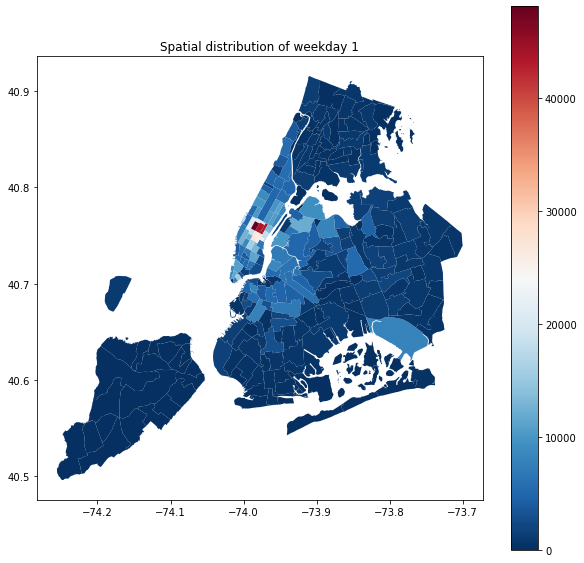

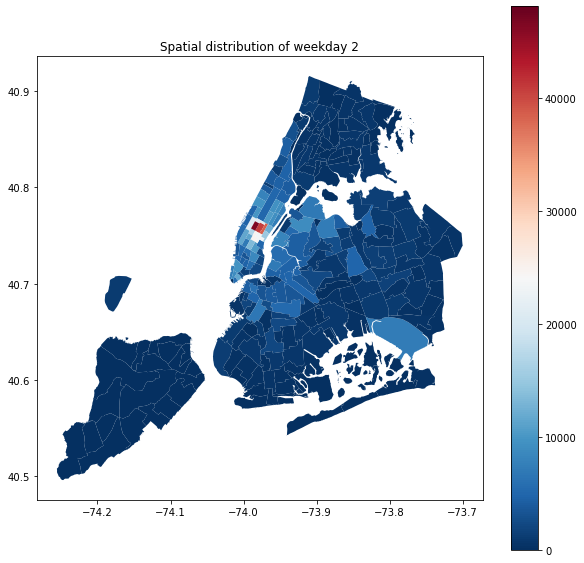

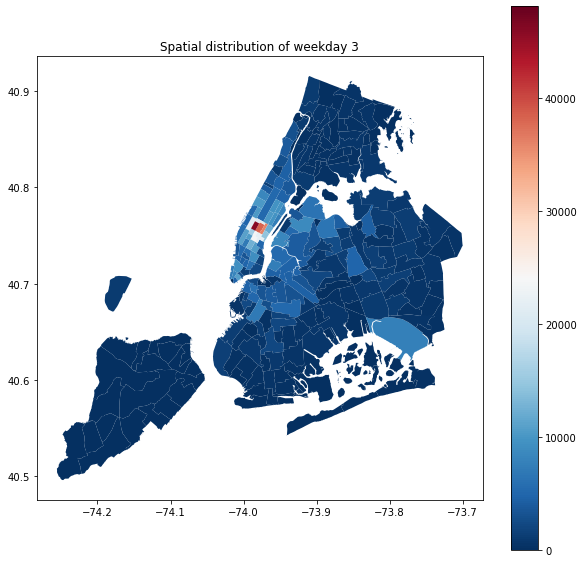

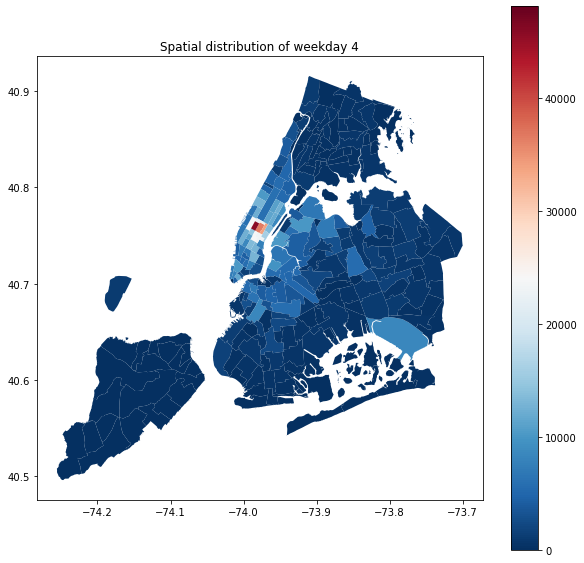

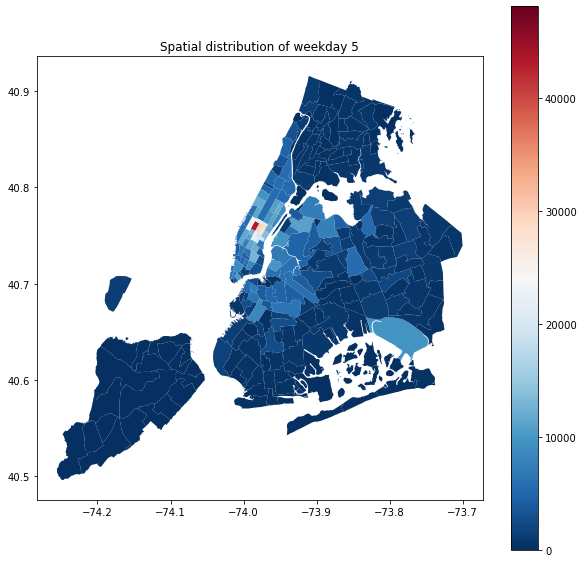

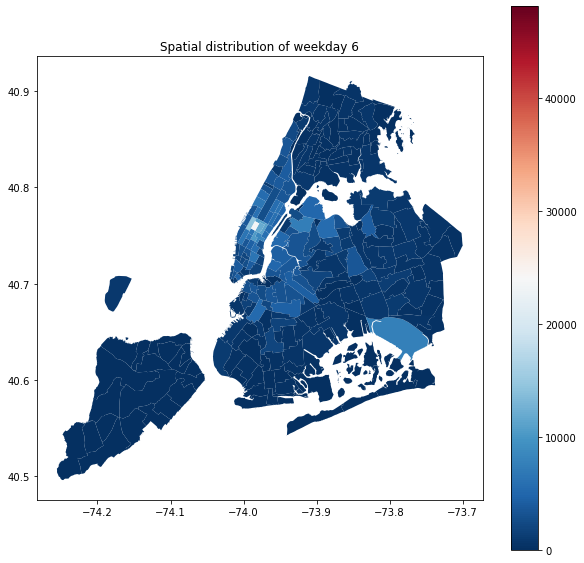

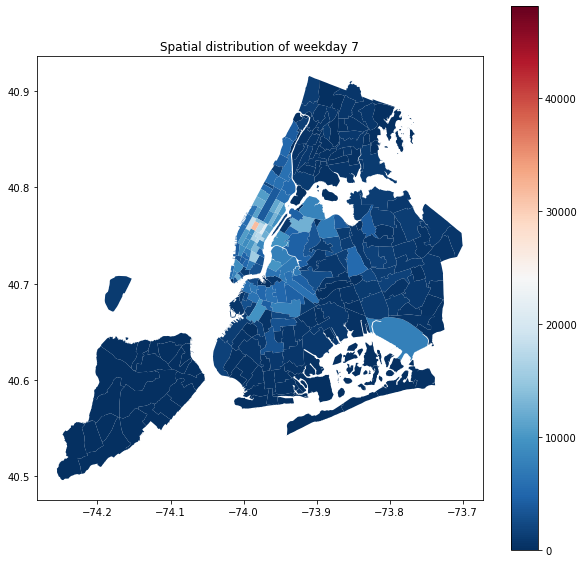

In [15]:
#use loop to plot
Spatial_data=gpd.GeoDataFrame(Spatial_data)

for i in range(0,7):
    Spatial_DOW=Spatial_data[Spatial_data['DOW']==i]
    fig, ax = plt.subplots(1, figsize=(10,10))
    weekday=i+1
    weekday=str(weekday)
    Spatial_DOW.plot(ax=ax, column='vehicle_count', cmap='RdBu_r', legend=True,vmin=min_val, vmax=max_val)
    plt.title("Spatial distribution of weekday"+" "+weekday)

## Task 2: Data preprocessing

### Q1. aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data
Hint: you may need to precess data format in two datasets before merge.

In [16]:
# example of taxi ridership date-hour level aggregation output

#aggregate ridership to date-hour level 
ridership_data=TaxiRidership.groupby(['Date']).sum()
ridership_data=ridership_data[['vehicle_count']]
ridership_data

,vehicle_count
Date,
2018-01-01 00:00:00,142.0
2018-01-01 01:00:00,23.0
2018-01-01 02:00:00,2.0
2018-01-01 03:00:00,1.0
2018-01-01 04:00:00,13.0
...,...
2018-12-31 19:00:00,467.0
2018-12-31 20:00:00,599.0
2018-12-31 21:00:00,384.0


In [17]:
#may need to precess data format in two datasets before merge.

ridership_data=ridership_data.reset_index()
ridership_data=ridership_data[['Date','vehicle_count']]
ridership_data

,Date,vehicle_count
0,2018-01-01 00:00:00,142.0
1,2018-01-01 01:00:00,23.0
2,2018-01-01 02:00:00,2.0
3,2018-01-01 03:00:00,1.0
4,2018-01-01 04:00:00,13.0
...,...,...
8755,2018-12-31 19:00:00,467.0
8756,2018-12-31 20:00:00,599.0
8757,2018-12-31 21:00:00,384.0
8758,2018-12-31 22:00:00,410.0


In [18]:
#merge with the flight arrival data
ridership_merge=ridership_data.merge(FlightArrival,how='left',left_on='Date',right_on='Date')
ridership_merge

,Date,vehicle_count,arrivals
0,2018-01-01 00:00:00,142.0,3
1,2018-01-01 01:00:00,23.0,0
2,2018-01-01 02:00:00,2.0,1
3,2018-01-01 03:00:00,1.0,0
4,2018-01-01 04:00:00,13.0,0
...,...,...,...
8755,2018-12-31 19:00:00,467.0,11
8756,2018-12-31 20:00:00,599.0,13
8757,2018-12-31 21:00:00,384.0,8
8758,2018-12-31 22:00:00,410.0,8


### Q2. add time-lagged arrivals (1,2,3,4,5,6..12 hours before)

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only be related to flight arrivals in the same hour, arrivals 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the costume or wait for luggage. Please add lag of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means adding 1 hour lag value of arrivals. `iloc` function works as well.

In [19]:
# example of dataset after added 12 lag arrivals features
for i in range(1,13):
    b=str(i)
    ridership_merge['lag'+b]=ridership_merge['arrivals'].shift(i)


ridership_merge

#ridership_merge.iloc[:20]

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,467.0,11,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0,11.0
8756,2018-12-31 20:00:00,599.0,13,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0
8757,2018-12-31 21:00:00,384.0,8,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0
8758,2018-12-31 22:00:00,410.0,8,8.0,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0


## Task 3. Data Exploration

### Q1. Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [20]:
# number of records
len(TaxiRidership),len(FlightArrival),len(ridership_merge)

(2251320, 8760, 8760)

So number of records of TaxiRidership,FlightArrival,FlightArrival respectively is 2251320, 8760, 8760.

In [21]:
# the total number of FHV and taxi trips
TaxiRidership.vehicle_count.sum(),ridership_merge.vehicle_count.sum()

(5430922.0, 5430922.0)

So the total number of FHV and taxi trips is 5430922.

In [22]:
 #total number of arriving flights
FlightArrival.arrivals.sum(),ridership_merge.arrivals.sum()

(163713, 163713)

So the total number of arriving flights is 163713

### Q2. Plot a probability distribution function of hourly ridership volume on weekdays and weekend, and apply t-test to check is there a significant difference of hourly ridership between each day of week and the rest of the days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [23]:
#get the data of weekend and weekday
data_distribution=ridership_merge
data_distribution['DOW']=pd.DatetimeIndex(data_distribution.Date).weekday

data_weekday=data_distribution[(data_distribution['DOW']==0)|(data_distribution['DOW']==1)|(data_distribution['DOW']==2)|(data_distribution['DOW']==3)|(data_distribution['DOW']==4)]
data_weekend=data_distribution[(data_distribution['DOW']==5)|(data_distribution['DOW']==6)]

In [24]:
# standardize the data 
scaler_weekday = StandardScaler().fit(data_weekday[['vehicle_count']])
weekday_standardized = pd.DataFrame(scaler_weekday.transform(data_weekday[['vehicle_count']]))
scaler_weekend = StandardScaler().fit(data_weekend[['vehicle_count']])
weekend_standardized = pd.DataFrame(scaler_weekend.transform(data_weekend[['vehicle_count']]))

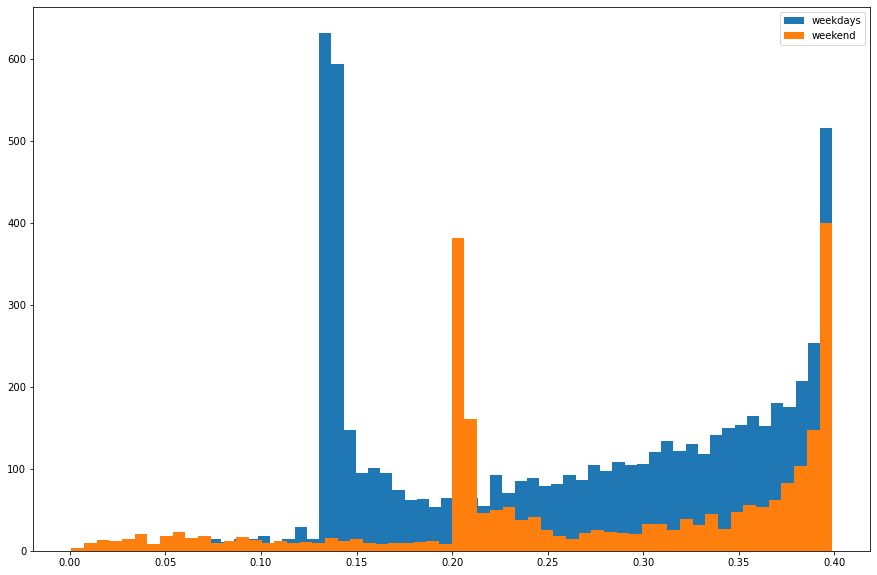

In [25]:
#  get the  PDF
from scipy.stats import norm
weekdaypdf = norm.pdf(weekday_standardized[0],weekday_standardized[0].mean(), weekday_standardized[0].std())
weekendpdf = norm.pdf(weekend_standardized[0],weekend_standardized[0].mean(),weekend_standardized[0].std())

# Plot a probability distribution function of hourly ridership volume on weekdays and weekend
plt.subplots(figsize=(15,10))
plt.hist(weekdaypdf,bins=60,label='weekdays')
plt.hist(weekendpdf,bins=60,label='weekend')
plt.legend()

In [26]:
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 0.26
Standard deviation = 0.10
1 percentile = 0.09
5 percentile = 0.13
25 percentile = 0.15
50 percentile = 0.28
75 percentile = 0.36
95 percentile = 0.40
99 percentile = 0.40


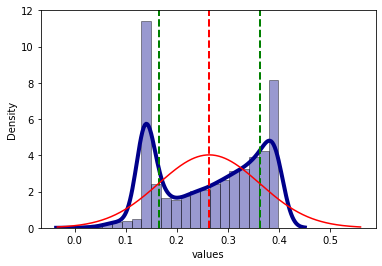

In [27]:
#weekday_PDF
distribution_analysis(weekdaypdf, fit_distribution='normal',bins=20);

Mean = 0.28
Standard deviation = 0.11
1 percentile = 0.02
5 percentile = 0.06
25 percentile = 0.20
50 percentile = 0.28
75 percentile = 0.38
95 percentile = 0.40
99 percentile = 0.40


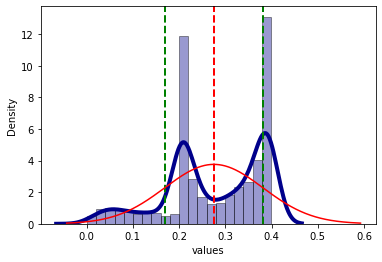

In [28]:
#weekend_PDF
distribution_analysis(weekendpdf, fit_distribution='normal',bins=20);

In [29]:
#apply t-test to check  between each day of week and the rest of the days
t_test=[]
for i in range(7):
    # Select the data of each day
    data_day=data_distribution[(data_distribution['DOW']==i)]
    
    #Select the data of other day
    other_day=data_distribution[(data_distribution['DOW']!=i)]
    
    # apply t test
    p = stats.ttest_ind(data_day['vehicle_count'],other_day['vehicle_count']).pvalue
    
    #distinguish the status
    if p<0.05:
        result = True 
    else:
        result = False
    t_test.append(result)
    

t_test


[True, False, False, True, True, True, False]

In [30]:
#Report hypothesis testing result in a  7×1  table
#index name should be day of week (e.g. Monday)
test_result=pd.DataFrame({'Result':t_test}, index = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
test_result

,Result
Mon,True
Tue,False
Wed,False
Thur,True
Fri,True
Sat,True
Sun,False


### Q3 .  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

In [31]:
ridership_merge['Month']= pd.DatetimeIndex(ridership_merge.Date).month
data_month=ridership_merge.groupby(by='Month').sum().sort_values(by='vehicle_count',ascending=False)
data_month

,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,DOW
Month,,,,,,,,,,,,,,,
10,507190.0,14585,14594.0,14600.0,14615.0,14626.0,14628.0,14636.0,14634.0,14636.0,14640.0,14645.0,14659.0,14656.0,2088
11,499905.0,13508,13501.0,13495.0,13477.0,13458.0,13460.0,13457.0,13455.0,13446.0,13445.0,13435.0,13425.0,13418.0,2184
5,497572.0,14297,14284.0,14279.0,14290.0,14298.0,14298.0,14309.0,14313.0,14313.0,14316.0,14317.0,14319.0,14320.0,2160
6,479624.0,14312,14333.0,14350.0,14360.0,14371.0,14383.0,14385.0,14389.0,14398.0,14403.0,14404.0,14408.0,14414.0,2232
8,468856.0,14259,14258.0,14251.0,14247.0,14245.0,14246.0,14261.0,14259.0,14271.0,14271.0,14276.0,14279.0,14282.0,2232
9,456470.0,13433,13431.0,13441.0,13446.0,13450.0,13449.0,13435.0,13434.0,13432.0,13428.0,13426.0,13427.0,13430.0,2280
4,455743.0,13840,13831.0,13817.0,13798.0,13776.0,13755.0,13736.0,13723.0,13720.0,13709.0,13698.0,13685.0,13679.0,2160
12,454425.0,13224,13233.0,13246.0,13272.0,13294.0,13312.0,13330.0,13343.0,13357.0,13370.0,13383.0,13385.0,13400.0,2280
7,439348.0,13904,13897.0,13889.0,13871.0,13856.0,13843.0,13829.0,13827.0,13811.0,13805.0,13802.0,13790.0,13784.0,2184


month 10 has the highest taxi riderships.

In [32]:
ridership_month=ridership_merge[ridership_merge['Month']==10]
ridership_month

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,DOW,Month
6552,2018-10-01 00:00:00,513.0,0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,33.0,22.0,0,10
6553,2018-10-01 01:00:00,9.0,0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,33.0,0,10
6554,2018-10-01 02:00:00,3.0,0,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,0,10
6555,2018-10-01 03:00:00,2.0,0,0.0,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,0,10
6556,2018-10-01 04:00:00,10.0,0,0.0,0.0,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2018-10-31 19:00:00,898.0,31,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,31.0,19.0,2,10
7292,2018-10-31 20:00:00,634.0,16,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,31.0,2,10
7293,2018-10-31 21:00:00,680.0,16,16.0,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,2,10
7294,2018-10-31 22:00:00,541.0,15,16.0,16.0,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,2,10


In [33]:
scaler = StandardScaler().fit(ridership_month[["vehicle_count","arrivals"]])
ridership_month[['vehicle_count','arrivals']]=scaler.transform(ridership_month[['vehicle_count','arrivals']])
ridership_month

/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_50611/228841376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridership_month[['vehicle_count','arrivals']]=scaler.transform(ridership_month[['vehicle_count','arrivals']])


,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,DOW,Month
6552,2018-10-01 00:00:00,-0.345627,-1.434209,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,33.0,22.0,0,10
6553,2018-10-01 01:00:00,-1.378161,-1.434209,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,33.0,0,10
6554,2018-10-01 02:00:00,-1.390453,-1.434209,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,29.0,0,10
6555,2018-10-01 03:00:00,-1.392502,-1.434209,0.0,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,33.0,0,10
6556,2018-10-01 04:00:00,-1.376112,-1.434209,0.0,0.0,0.0,0.0,20.0,21.0,31.0,27.0,33.0,35.0,30.0,27.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2018-10-31 19:00:00,0.443115,0.833779,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,31.0,19.0,2,10
7292,2018-10-31 20:00:00,-0.097736,-0.263635,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,31.0,2,10
7293,2018-10-31 21:00:00,-0.003497,-0.263635,16.0,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,26.0,2,10
7294,2018-10-31 22:00:00,-0.288264,-0.336796,16.0,16.0,31.0,27.0,32.0,25.0,29.0,24.0,19.0,25.0,23.0,33.0,2,10


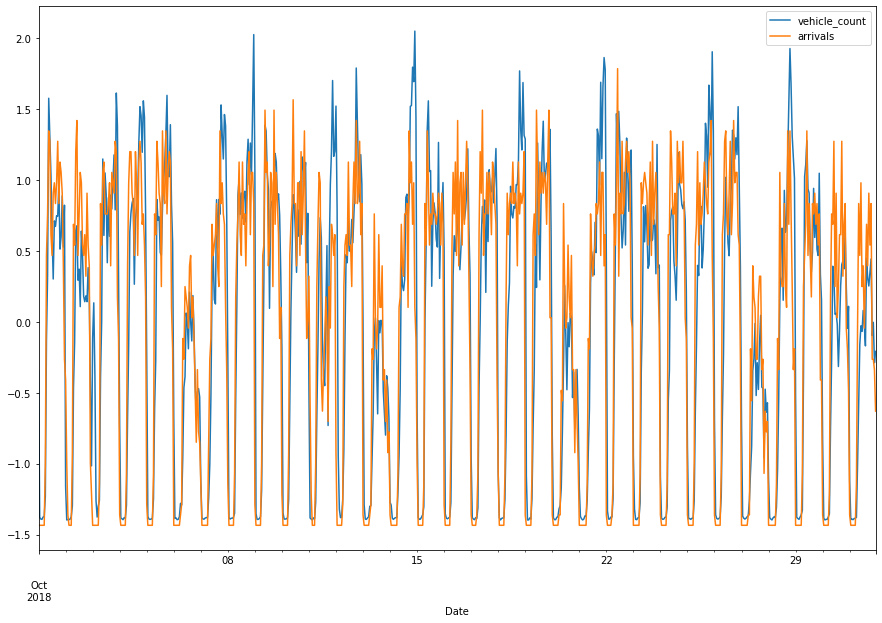

In [34]:
#  Plot the timeline of the `vehicle_count` and `arrivals` 

ridership_month.plot(x='Date',y=['vehicle_count','arrivals'],figsize=(15,10))
plt.show()

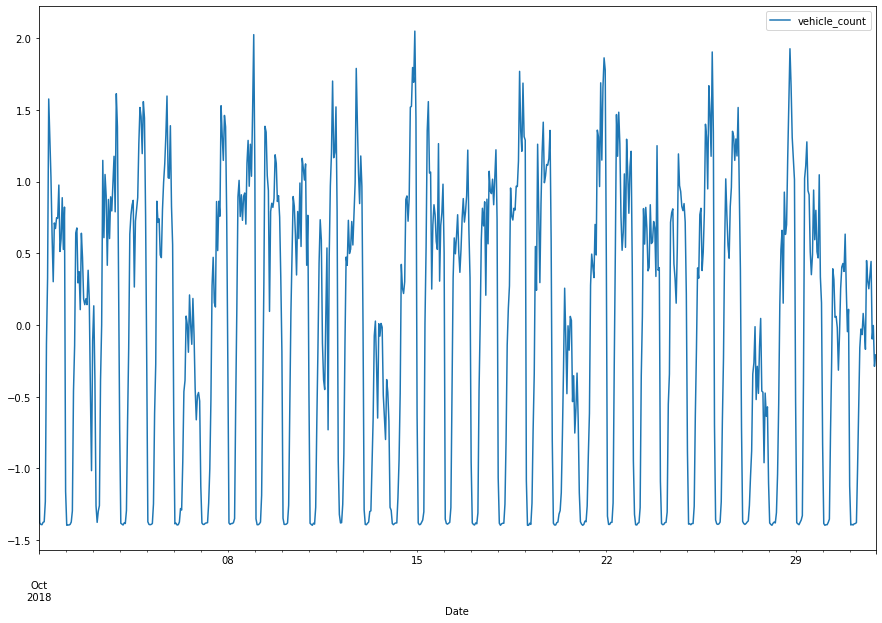

In [35]:
ridership_month.plot(x='Date',y='vehicle_count',figsize=(15,10))
plt.show()

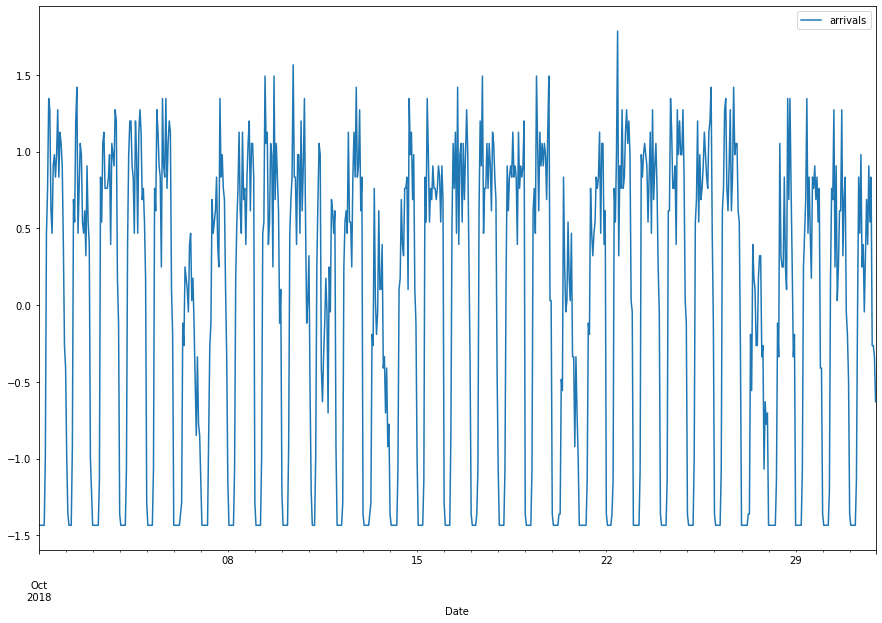

In [36]:
ridership_month.plot(x='Date',y='arrivals',figsize=(15,10))
plt.show()

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data

### Q1. split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [37]:
#get day from beginning of the year
data_reg=ridership_merge
data_reg['day']=((data_reg.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)
data_reg['DOW']=pd.DatetimeIndex(data_reg.Date).weekday
data_reg['Hour']=pd.DatetimeIndex(data_reg.Date).hour


In [38]:
data_reg

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,DOW,Month,day,Hour
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,2
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,3
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,467.0,11,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0,11.0,0,12,364,19
8756,2018-12-31 20:00:00,599.0,13,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0,0,12,364,20
8757,2018-12-31 21:00:00,384.0,8,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,0,12,364,21
8758,2018-12-31 22:00:00,410.0,8,8.0,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,0,12,364,22


In [39]:
data_Train=data_reg[data_reg['day']<90]
data_valid=data_reg[(data_reg['day']>=90)&(data_reg['day']<270)]
data_Test=data_reg[(data_reg['day']>=275)&(data_reg['day']<365)]

In [40]:
len(data_Train.day.unique()),len(data_valid.day.unique()),len(data_Test.day.unique())

(90, 180, 90)

### Q2.  Build an OLS model 

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for `arrivals`. What does it indicate? Report the 99% confidence interval for arrivals's coefficient. Scatter plot for ridership and flight arrival, include the predictive line.

In [41]:
from sklearn.linear_model import LinearRegression
lm = smf.ols(formula='vehicle_count ~ arrivals', data = data_Train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5657.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:45:52   Log-Likelihood:                -14690.
No. Observations:                2160   AIC:                         2.938e+04
Df Residuals:                    2158   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8315      7.772      9.757      0.0

the p value of arrival is significant at 5% level. So the arrival has 26.2834 effect with vehicle_count

In [42]:
# Report the 99% confidence interval for arrivals's coefficient.
conf_int = lm.conf_int(alpha=0.01)
print(conf_int.loc['arrivals'])

0    25.382394
1    27.184322
Name: arrivals, dtype: float64


the 99% confidence interval for arrivals's coefficient is [25.382394,27.184322].

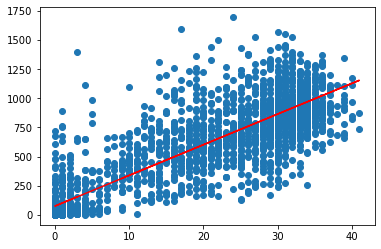

In [43]:
#Scatter plot for ridership and flight arrival, include the predictive line.

ride_pred = lm.predict()
plt.scatter(data_Train['arrivals'],data_Train['vehicle_count'])
plt.plot(data_Train['arrivals'], ride_pred, color='red')

### Q3. Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?

In [44]:
#build the formula
formula='vehicle_count~arrivals+'+'+'.join(['lag%d'%p for p in range(1,13)]); formula

'vehicle_count~arrivals+lag1+lag2+lag3+lag4+lag5+lag6+lag7+lag8+lag9+lag10+lag11+lag12'

In [45]:
lm1 = smf.ols(formula=formula, data = data_Train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:45:52   Log-Likelihood:                -13884.
No. Observations:                2148   AIC:                         2.780e+04
Df Residuals:                    2134   BIC:                         2.788e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.5959      9.574     -5.598      0.0

According the results, the arrivals,lag1,lag3,lag3,lag9 have a statistically significant impact according to p-values at 5% level.

### Q4: Incorporate Temporal Patterns 

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values. 

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [46]:
#build the dummies first
data_Train = data_Train.join(pd.get_dummies(data_Train.Hour,prefix='Hour'))
data_Train = data_Train.join(pd.get_dummies(data_Train.DOW,prefix='DOW'))
data_Train

,Date,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,Hour_21,Hour_22,Hour_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2018-03-31 19:00:00,278.0,11,16.0,20.0,27.0,20.0,20.0,18.0,23.0,...,0,0,0,0,0,0,0,0,1,0
2156,2018-03-31 20:00:00,280.0,11,11.0,16.0,20.0,27.0,20.0,20.0,18.0,...,0,0,0,0,0,0,0,0,1,0
2157,2018-03-31 21:00:00,420.0,16,11.0,11.0,16.0,20.0,27.0,20.0,20.0,...,1,0,0,0,0,0,0,0,1,0
2158,2018-03-31 22:00:00,279.0,14,16.0,11.0,11.0,16.0,20.0,27.0,20.0,...,0,1,0,0,0,0,0,0,1,0


In [47]:
#build the formula
formula='vehicle_count~arrivals+'+'+'.join(['lag%d'%p for p in range(1,13)])
formula=formula+'+'+'+'.join(['Hour_%d'%p for p in range(0,24)])
formula=formula+'+'+'+'.join(['DOW_%d'%p for p in range(0,7)])
formula

'vehicle_count~arrivals+lag1+lag2+lag3+lag4+lag5+lag6+lag7+lag8+lag9+lag10+lag11+lag12+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'

In [48]:
lm2 = smf.ols(formula=formula, data = data_Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:45:52   Log-Likelihood:                -13522.
No. Observations:                2148   AIC:                         2.713e+04
Df Residuals:                    2105   BIC:                         2.737e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.7069      9.394      4.972      0.0

### Q5. Perform feature selection for lag variables
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [49]:
data_valid = data_valid.join(pd.get_dummies(data_valid.Hour,prefix='Hour'))
data_valid = data_valid.join(pd.get_dummies(data_valid.DOW,prefix='DOW'))

In [50]:
TrainR2=[0]*13
ValidR2=[0]*13
lm=[0]*13
for M in range(0,13):
    if M==0:
        formula='vehicle_count~arrivals'
    else:
        formula='vehicle_count~arrivals+'+'+'.join(['lag%d'%p for p in range(1,M+1)])
    formula=formula+'+'+'+'.join(['Hour_%d'%p for p in range(0,24)])
    formula=formula+'+'+'+'.join(['DOW_%d'%p for p in range(0,7)])
    lm[M] = smf.ols(formula=formula, data = data_Train).fit()
    data_valid['ypred']=lm[M].predict(data_valid)
    ValidR2[M]=1-((data_valid.ypred-data_valid.vehicle_count)**2).sum()/((data_valid.vehicle_count-data_valid.vehicle_count.mean())**2).sum()
    TrainR2[M]=lm[M].rsquared

In [51]:
TrainR2,ValidR2

([0.8709037168643423,
  0.8966342315311133,
  0.8989796099780093,
  0.8992347949663889,
  0.8991638163944379,
  0.8991998821667888,
  0.8991282171713518,
  0.8991168058582618,
  0.8991341421537847,
  0.8993496317791205,
  0.8993918605120199,
  0.8994474654605215,
  0.8994877453040975],
 [0.823965044989756,
  0.8542208128666979,
  0.855935158360844,
  0.85507560453687,
  0.8550388226709553,
  0.8548442256450469,
  0.8548414145273986,
  0.8549355168196549,
  0.8551711672410689,
  0.8558485632418458,
  0.8555049799065993,
  0.8556445104148886,
  0.8554947166392541])

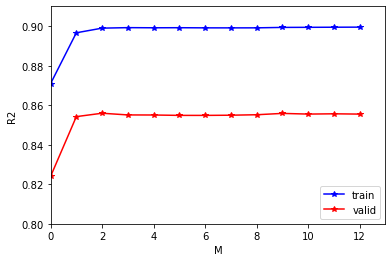

In [52]:
plt.plot(range(0,13),TrainR2[:13],'b-*',label='train')
plt.plot(range(0,13),ValidR2[:13],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(0.8,0.91)
plt.xlim(0,13)
plt.legend(loc='lower right')

In [53]:
M=np.argmax(ValidR2); M

2

In [54]:
formula='vehicle_count~arrivals+'+'+'.join(['lag%d'%p for p in range(1,3)])
formula=formula+'+'+'+'.join(['Hour_%d'%p for p in range(0,24)])
formula=formula+'+'+'+'.join(['DOW_%d'%p for p in range(0,7)])
lmQ5=smf.ols(formula=formula, data = data_Train).fit()

In [55]:
data_Test = data_Test.join(pd.get_dummies(data_Test.Hour,prefix='Hour'))
data_Test = data_Test.join(pd.get_dummies(data_Test.DOW,prefix='DOW'))

In [56]:
pred_t = lmQ5.predict(data_Test)
TestR2=1-((pred_t-data_Test.vehicle_count)**2).sum()/((data_Test.vehicle_count-data_Test.vehicle_count.mean())**2).sum()
TestR2

0.8183283144229442

### Q6. Visualize temporal patterns and lag impacts through bar plots
For the best regression above visualize:
- bar plot of hour vs its impact (slope coefficient)
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

<AxesSubplot:>

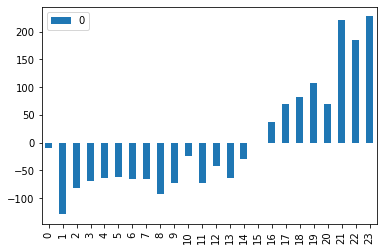

In [57]:
Hour_impact = []
for i in range(24):
    Hour_impact.append(lmQ5.params['Hour_' + str(i)])
pd.DataFrame(Hour_impact).plot.bar()

<AxesSubplot:>

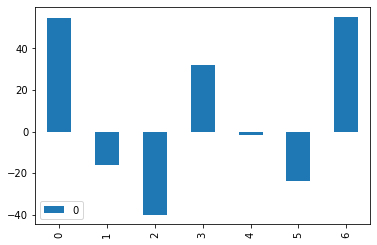

In [58]:
DOW_impact = []
for i in range(7):
    DOW_impact.append(lmQ5.params['DOW_' + str(i)])
pd.DataFrame(DOW_impact).plot.bar()

<AxesSubplot:>

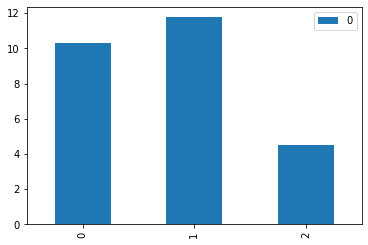

In [59]:
lag = [lmQ5.params['arrivals']]
for i in range(2):
    lag.append(lmQ5.params['lag' + str(i+1)])
pd.DataFrame(lag).plot.bar()

## Task 5. Cluster the days of the year based on the relative timeline of their FHV and taxi departures from the airport

### Q1. From the entire `dataset`, create a dataframe with days as rows, hours as columns, and ridership as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership

In [60]:
ridership_merge['day']=((ridership_merge.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)
#get day from beginning of the year, hour and day of the week from datetime
ridership_merge['Hour']=pd.DatetimeIndex(ridership_merge.Date).hour
cluster_data=ridership_merge
cluster_data=cluster_data[['day','Hour','vehicle_count']]
cluster_data

,day,Hour,vehicle_count
0,0,0,142.0
1,0,1,23.0
2,0,2,2.0
3,0,3,1.0
4,0,4,13.0
...,...,...,...
8755,364,19,467.0
8756,364,20,599.0
8757,364,21,384.0
8758,364,22,410.0


In [61]:
pivot=pd.pivot_table(cluster_data,index='day',values='vehicle_count',columns='Hour')
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,142.0,23.0,2.0,1.0,13.0,13.0,15.0,46.0,248.0,443.0,...,765.0,865.0,776.0,1182.0,804.0,765.0,744.0,1025.0,1196.0,1079.0
1,791.0,50.0,28.0,2.0,5.0,16.0,24.0,301.0,550.0,1117.0,...,892.0,650.0,820.0,927.0,979.0,940.0,811.0,1048.0,1034.0,735.0
2,674.0,309.0,24.0,3.0,8.0,12.0,44.0,176.0,531.0,777.0,...,700.0,688.0,907.0,1011.0,871.0,713.0,507.0,480.0,566.0,301.0
3,295.0,11.0,2.0,1.0,10.0,15.0,43.0,31.0,32.0,29.0,...,68.0,80.0,40.0,45.0,29.0,28.0,21.0,32.0,37.0,72.0
4,387.0,164.0,29.0,15.0,7.0,14.0,36.0,92.0,89.0,232.0,...,591.0,679.0,723.0,883.0,882.0,950.0,894.0,1055.0,761.0,957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,572.0,124.0,52.0,3.0,4.0,17.0,60.0,174.0,694.0,863.0,...,859.0,968.0,806.0,997.0,1108.0,1136.0,915.0,603.0,942.0,665.0
361,470.0,656.0,390.0,66.0,14.0,15.0,65.0,200.0,536.0,769.0,...,951.0,977.0,983.0,966.0,1075.0,1003.0,907.0,1167.0,1214.0,721.0
362,627.0,139.0,4.0,6.0,5.0,30.0,64.0,122.0,464.0,603.0,...,664.0,975.0,844.0,877.0,1026.0,954.0,1082.0,1048.0,710.0,765.0


In [62]:
#Normalize each row by the total daily ridership
Totalride=pivot.sum(axis=1)
pivot=pivot.div(pivot.sum(axis=1), axis=0)
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.038981,0.008450,0.003544,0.000204,0.000273,0.001159,0.004089,0.011858,0.047295,0.058812,...,0.058539,0.065967,0.054927,0.067943,0.075508,0.077416,0.062355,0.041093,0.064195,0.045318
361,0.028664,0.040007,0.023785,0.004025,0.000854,0.000915,0.003964,0.012197,0.032689,0.046899,...,0.057998,0.059584,0.059950,0.058913,0.065561,0.061170,0.055315,0.071172,0.074038,0.043971
362,0.045037,0.009984,0.000287,0.000431,0.000359,0.002155,0.004597,0.008763,0.033329,0.043313,...,0.047694,0.070033,0.060623,0.062994,0.073696,0.068525,0.077719,0.075277,0.050998,0.054949


### Q2. Try K-means with different numbers of clusters k=2..7, report average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [64]:
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(pivot)
    #report average Silhouette score
    silhouette_avg = silhouette_score(pivot, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.18929824985499946
For n_clusters =3, the average silhouette_score is :0.22324051576230952
For n_clusters =4, the average silhouette_score is :0.23329518409569264
For n_clusters =5, the average silhouette_score is :0.22514662772630314
For n_clusters =6, the average silhouette_score is :0.17602827344678348
For n_clusters =7, the average silhouette_score is :0.17725740332000367


It has highest silhouette_score when n=4. So k is optimal when n=4.
For n_clusters =4, the average silhouette_score is :0.23329518409569264

### Q3. Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that? 
Hint: Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above. 

In [65]:
clusterer = KMeans(n_clusters=4, random_state=324)
cluster_labels = clusterer.fit_predict(pivot)
cluster_labels=cluster_labels.tolist()
cluster_labels

[0,
 1,
 3,
 2,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 2,
 3,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 2,
 3,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 2,
 3,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 2,
 2,
 1,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 2,


In [66]:
day=pivot.index.tolist()

cluster_dic={'day':day,'cluster':cluster_labels,
}
cluster_dic

{'day': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  15

In [67]:
#Get the day of week list
data1=TaxiRidership.drop_duplicates(subset=['day'])
DOW_day=data1['DOW'].tolist()
DOW_day

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,


In [68]:
clust=pd.DataFrame.from_dict(cluster_dic)
clust['DOW']=DOW_day
clust

,day,cluster,DOW
0,0,0,0
1,1,1,1
2,2,3,2
3,3,2,3
4,4,0,4
...,...,...,...
360,360,1,3
361,361,1,4
362,362,1,5
363,363,1,6


In [69]:
pivot_dow=pd.pivot_table(clust,index='cluster',values='DOW',columns='DOW',aggfunc='count')
pivot_dow

DOW,0,1,2,3,4,5,6
cluster,,,,,,,
0,6.0,4.0,4.0,15.0,6.0,1.0,49.0
1,37.0,42.0,41.0,30.0,33.0,2.0,3.0
2,7.0,6.0,5.0,6.0,11.0,9.0,NaN
3,3.0,NaN,2.0,1.0,2.0,40.0,NaN


For cluster 0, sunday has appears most. For cluster 1, weekay has appears high. For cluster 2,no day has the high frequency. For cluster 3,sat is most high.

As we can see, the cluster has repeated periods. It is divided into weekdays, Saturdays and Sundays. The cluster 2 may represent special days，such as holidays. It means the ridership has periods like above.

### Q4 visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.
Hint: Use the pivot table to collect total riders per hour of the day within each cluster for visualization (after appropriate normalization by the grand total).

In [70]:
hour_clust=cluster_data
hour_clust=hour_clust.astype(int)
hour_clust

,day,Hour,vehicle_count
0,0,0,142
1,0,1,23
2,0,2,2
3,0,3,1
4,0,4,13
...,...,...,...
8755,364,19,467
8756,364,20,599
8757,364,21,384
8758,364,22,410


In [71]:
day_append=[]
for ind,row in hour_clust.iterrows():
    clu=cluster_labels[row['day']]
    day_append.append(clu)
day_append

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [72]:
hour_clust['cluster']=day_append
hour_clust

,day,Hour,vehicle_count,cluster
0,0,0,142,0
1,0,1,23,0
2,0,2,2,0
3,0,3,1,0
4,0,4,13,0
...,...,...,...,...
8755,364,19,467,3
8756,364,20,599,3
8757,364,21,384,3
8758,364,22,410,3


In [73]:
pivot_hour=pd.pivot_table(hour_clust,index='Hour',values='vehicle_count',columns='cluster',aggfunc='sum')
pivot_hour

cluster,0,1,2,3
Hour,,,,
0,18248,83878,47450,20379
1,2334,9883,21391,2825
2,555,2883,4919,996
3,419,806,806,248
4,542,1149,535,362
5,827,1917,708,507
6,1754,7568,2165,1424
7,10413,71443,12578,3714
8,26954,125195,23807,13210


In [74]:
#Normalize each row by the total daily ridership
pivot_hour=pivot_hour.div(pivot_hour.sum(axis=0), axis=1)
pivot_hour

cluster,0,1,2,3
Hour,,,,
0,0.014257,0.027542,0.069435,0.048279
1,0.001824,0.003245,0.031302,0.006693
2,0.000434,0.000947,0.007198,0.002360
3,0.000327,0.000265,0.001179,0.000588
4,0.000423,0.000377,0.000783,0.000858
5,0.000646,0.000629,0.001036,0.001201
6,0.001370,0.002485,0.003168,0.003374
7,0.008135,0.023459,0.018406,0.008799
8,0.021059,0.041108,0.034838,0.031295


<AxesSubplot:xlabel='Hour'>

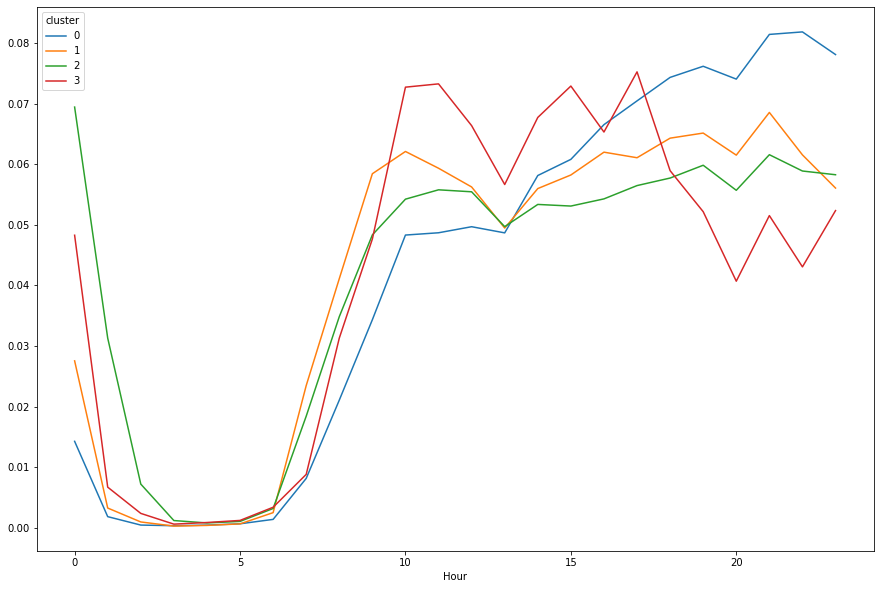

In [75]:
pivot_hour.plot(figsize=(15,10))

In [76]:
pivot_1=pd.pivot_table(hour_clust,index='cluster',values='vehicle_count',columns='Hour',aggfunc='sum')
pivot_1=pivot_1.div(pivot_1.sum(axis=1), axis=0)
pivot_1

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.014257,0.001824,0.000434,0.000327,0.000423,0.000646,0.001370,0.008135,0.021059,0.034330,...,0.058136,0.060803,0.066533,0.070455,0.074333,0.076168,0.074052,0.081428,0.081841,0.078103
1,0.027542,0.003245,0.000947,0.000265,0.000377,0.000629,0.002485,0.023459,0.041108,0.058429,...,0.055981,0.058223,0.061990,0.061070,0.064303,0.065143,0.061501,0.068547,0.061540,0.056065
2,0.069435,0.031302,0.007198,0.001179,0.000783,0.001036,0.003168,0.018406,0.034838,0.048337,...,0.053362,0.053094,0.054278,0.056473,0.057718,0.059830,0.055696,0.061571,0.058879,0.058264
3,0.048279,0.006693,0.002360,0.000588,0.000858,0.001201,0.003374,0.008799,0.031295,0.047656,...,0.067722,0.072903,0.065315,0.075246,0.058933,0.052164,0.040691,0.051520,0.043055,0.052347


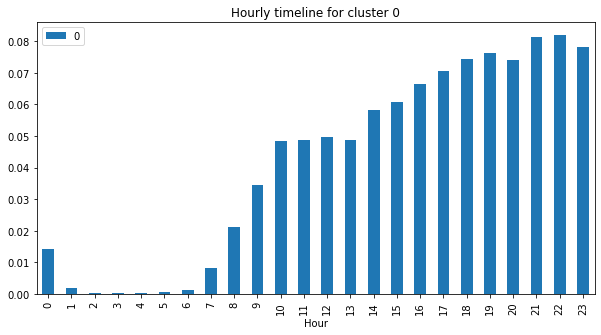

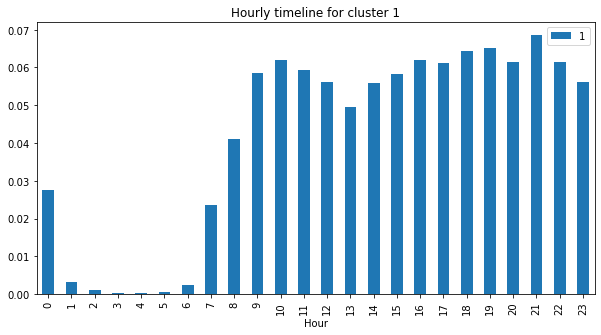

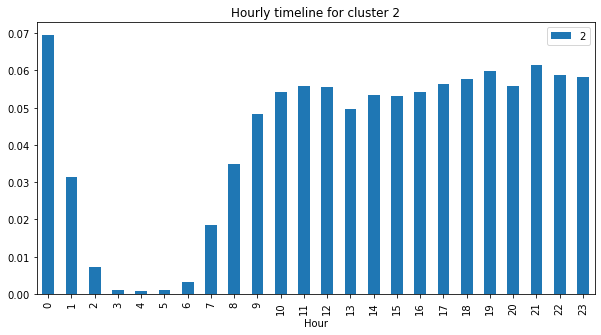

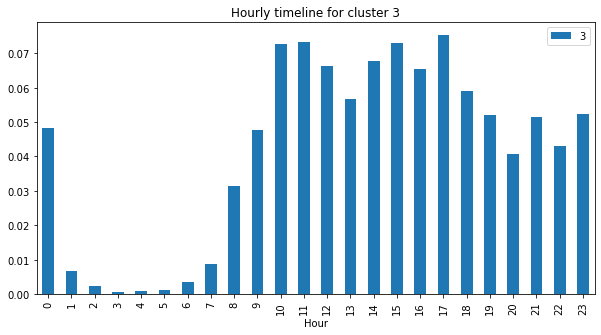

In [77]:
for i in range(0,4):
    fig, ax = plt.subplots(1, figsize=(10,5))
    a=pivot_1.iloc[i]
    a.plot.bar(legend=True)
    b=str(i)
    plt.title("Hourly timeline for cluster"+" "+b)